In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 500)
pd.options.display.max_rows;

In [2]:
def plot_barh(x,w,h):
    plt.figure(figsize=(w,h))
    x.plot(kind='barh')
    plt.show()

In [3]:
df1 = pd.read_csv('data/식신/데이터_식신/SSN000029_KDX_Bigcontest_data_Jan.csv', encoding='cp949')
df2 = pd.read_csv('data/식신/데이터_식신/SSN000029_KDX_Bigcontest_data_Feb.csv', encoding='cp949')
df3 = pd.read_csv('data/식신/데이터_식신/SSN000029_KDX_Bigcontest_data_Mar.csv', encoding='cp949')
df = pd.concat([df1,df2,df3],ignore_index=True)
df.shape

(29939, 11)

In [5]:
df.LOG_DATE.value_counts().sort_index()

20210101    371
20210102    384
20210103    350
20210104    259
20210105    309
20210106    252
20210107    236
20210108    265
20210109    319
20210110    345
20210111    301
20210112    323
20210113    296
20210114    348
20210115    407
20210116    419
20210117    445
20210118    332
20210119    295
20210120    307
20210121    346
20210122    389
20210123    398
20210124    396
20210125    289
20210126    318
20210127    278
20210128    290
20210129    341
20210130    372
20210131    348
20210201    349
20210202    275
20210203    313
20210204    305
20210205    370
20210206    464
20210207    378
20210208    295
20210209    329
20210210    306
20210211    324
20210212    340
20210213    479
20210214    355
20210215    325
20210216    358
20210217    298
20210218    346
20210219    437
20210220    413
20210221    324
20210222     24
20210223     92
20210224     94
20210225    323
20210226    415
20210227    475
20210228    491
20210301    457
20210302    276
20210303    332
20210304

In [6]:
df.INQ_CNT.value_counts().sort_index()

1        47
2     25980
3        71
4      2969
5         6
6       562
7         2
8       192
10       66
11        1
12       24
14        6
15        1
16        3
18        2
22        2
26        1
30        2
46        1
48        1
Name: INQ_CNT, dtype: int64

In [7]:
df.LOG_CITY_NM.value_counts()

Seoul              9943
Busan              3174
Gunsan-si          2856
Mokpo-si           2195
Gwangju            1317
Tongyeong-si       1071
Daegu               900
Daejeon             601
Jeonju-si           594
Incheon             432
Muan-gun            391
Geoje-si            329
Iksan               279
Yeongam-gun         241
Gimhae-si           239
Yongin-si           228
Ulsan               220
Seongnam-si         204
Haman-gun           203
Suwon-si            186
Goyang-si           182
Hwaseong-si         178
Cheongju-si         141
Cheonan-si          140
Anyang              130
Pyeongtaek-si       100
Haenam-gun           99
Bucheon-si           97
Jinju-si             96
Ansan-si             94
Namyangju-si         92
Jeju-si              92
Pohang-si            79
Gimje-si             75
Wonju-si             74
Seocheon-gun         70
Siheung-si           70
Yeosu-si             69
Gongju-si            68
Jindo-gun            67
Suncheon-si          60
Cheongwon-gun   

In [8]:
df.ADDR

0                전라북도 군산시 중정길 11
1                전라북도 군산시 미제길 41
2                 전라북도 군산시 부곡로 6
3             전라북도 군산시 동메2길 32-4
4               전라북도 군산시 해망로 224
                  ...           
29934      경상남도 통영시 용남면 화포2길 152
29935      경상남도 통영시 용남면 견내량로 113
29936    경상남도 통영시 광도면 죽림1로 41-23
29937           경상남도 통영시 무전5길 18
29938           경상남도 통영시 무전5길 18
Name: ADDR, Length: 29939, dtype: object

In [9]:
df.PLC_NM.value_counts()

하당먹거리      205
장미칼국수      204
군산횟집       176
씨엘비베이커리    161
장터식당       156
          ... 
카페소풍         1
홍집           1
오리구삼         1
푸른가든         1
김여사포차        1
Name: PLC_NM, Length: 5520, dtype: int64

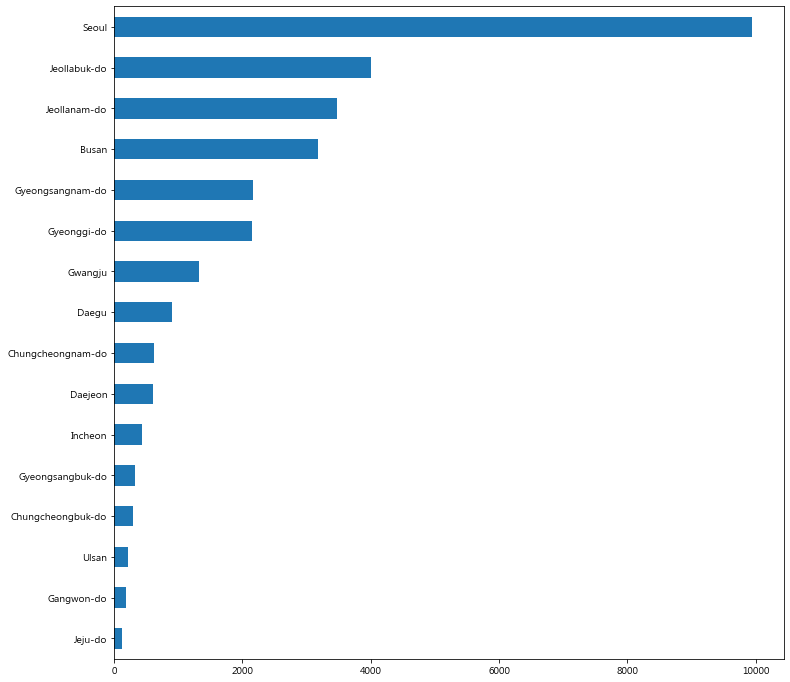

In [5]:
log_area = df.LOG_AREA_NM.value_counts(ascending=True)

plot_barh(log_area,12,12)

### 군산 통영 목포 나누기

In [6]:
df_gs = df.iloc[:3852]
df_mp = df.iloc[3852:7613]
df_ty = df.iloc[7613:]
len(df_gs)+len(df_mp)+len(df_ty)-len(df) # 검산

0

# Plot

## 세 곳 종합 Plot (%)

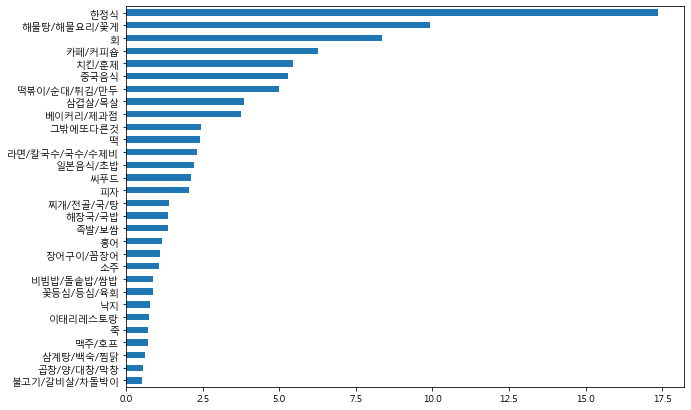

64

In [7]:
food_cate = df.SKSN_CGR_SCLS_NM.value_counts(ascending=True)
n_hits = sum(food_cate.values)
food_cate = food_cate*100/n_hits
plot_barh(food_cate[-30:],10,7)
len(food_cate)

### 군산, 목포, 통영의 음식점 종류별 조회수 비교 (%)

In [8]:
food_cate_gs = df_gs.SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_mp = df_mp.SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_ty = df_ty.SKSN_CGR_SCLS_NM.value_counts(ascending=True)

n_hits_gs = sum(food_cate_gs.values)
n_hits_mp = sum(food_cate_mp.values)
n_hits_ty = sum(food_cate_ty.values)
print( n_hits_gs, n_hits_mp, n_hits_ty, n_hits_gs + n_hits_mp + n_hits_ty - len(df)) # 검산

food_cate_gs = food_cate_gs*100/n_hits_gs
food_cate_mp = food_cate_mp*100/n_hits_mp
food_cate_ty = food_cate_ty*100/n_hits_ty

food_cate_gsmpty = pd.concat([food_cate,food_cate_gs,food_cate_mp,food_cate_ty],axis=1).fillna(0)
food_cate_gsmpty.columns=['전체','군산','목포','통영']

3852 3761 22326 0


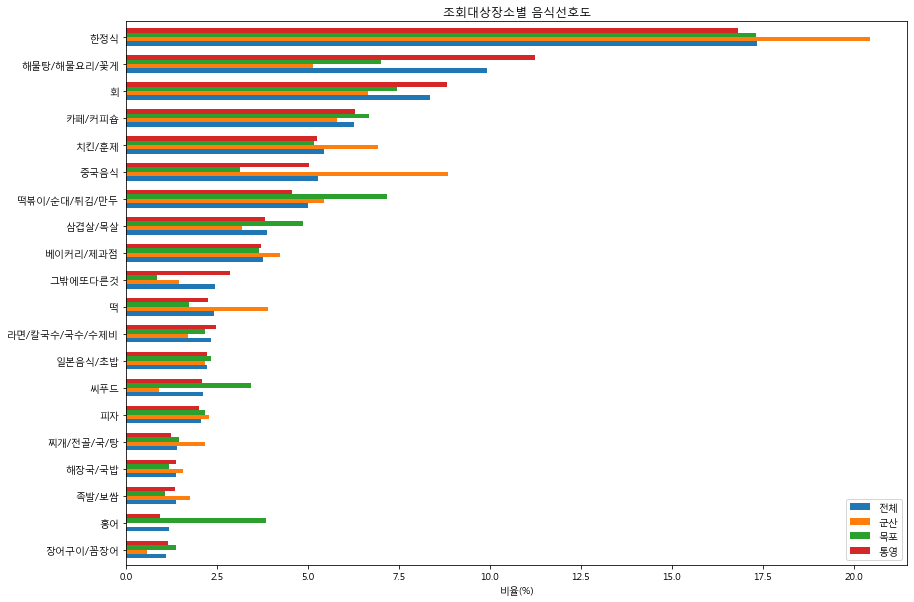

In [9]:
food_cate_gsmpty.iloc[-20:].plot(kind='barh',figsize=(14,10),width=0.65)
plt.xlabel('비율(%)')
plt.title('조회대상장소별 음식선호도')
plt.show()

## 군산시 Plot

1304 1008 1343 -197


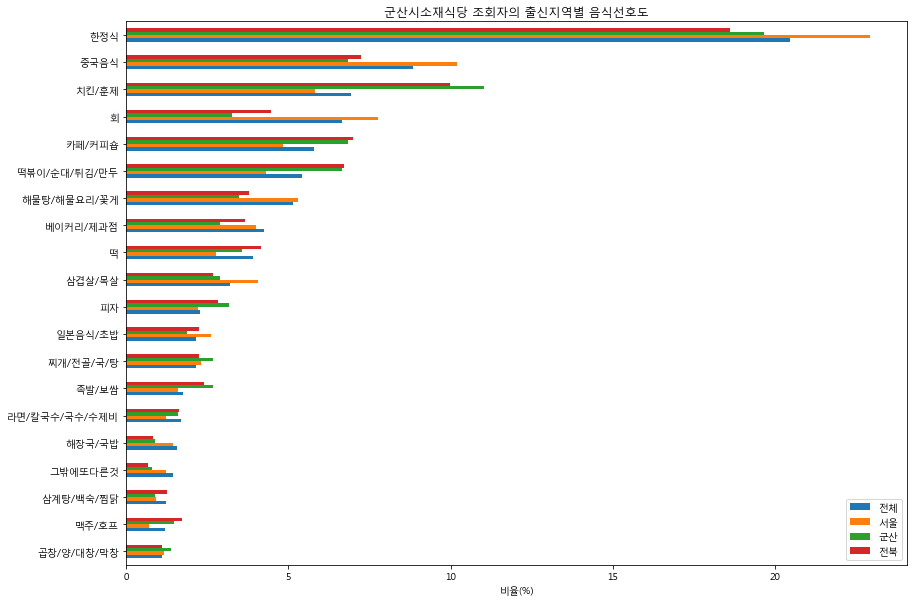

In [10]:
food_cate_gs_seoul = df_gs[df_gs.LOG_CITY_NM=='Seoul'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_gs_gs = df_gs[df_gs.LOG_CITY_NM=='Gunsan-si'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_gs_jb = df_gs[df_gs.LOG_AREA_NM=='Jeollabuk-do'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)

n_hits_gs_seoul = sum(food_cate_gs_seoul.values)
n_hits_gs_gs = sum(food_cate_gs_gs.values)
n_hits_gs_jb = sum(food_cate_gs_jb.values)
print( n_hits_gs_seoul, n_hits_gs_gs, n_hits_gs_jb, n_hits_gs_seoul + n_hits_gs_gs + n_hits_gs_jb - len(df_gs)) 
# 세 지역 이외지역에서도 마이너스 된만큼 조금 방문함

food_cate_gs_seoul = food_cate_gs_seoul*100/n_hits_gs_seoul
food_cate_gs_gs = food_cate_gs_gs*100/n_hits_gs_gs
food_cate_gs_jb = food_cate_gs_jb*100/n_hits_gs_jb

food_cate_gs_tsgj = pd.concat([food_cate_gs,food_cate_gs_seoul,food_cate_gs_gs,food_cate_gs_jb],axis=1).fillna(0)
food_cate_gs_tsgj.columns=['전체','서울','군산','전북']

food_cate_gs_tsgj.iloc[-20:].plot(kind='barh',figsize=(14,10))
plt.xlabel('비율(%)')
plt.title('군산시소재식당 조회자의 출신지역별 음식선호도')
plt.show()

## 목포시 Plot

1220 826 1235 -480


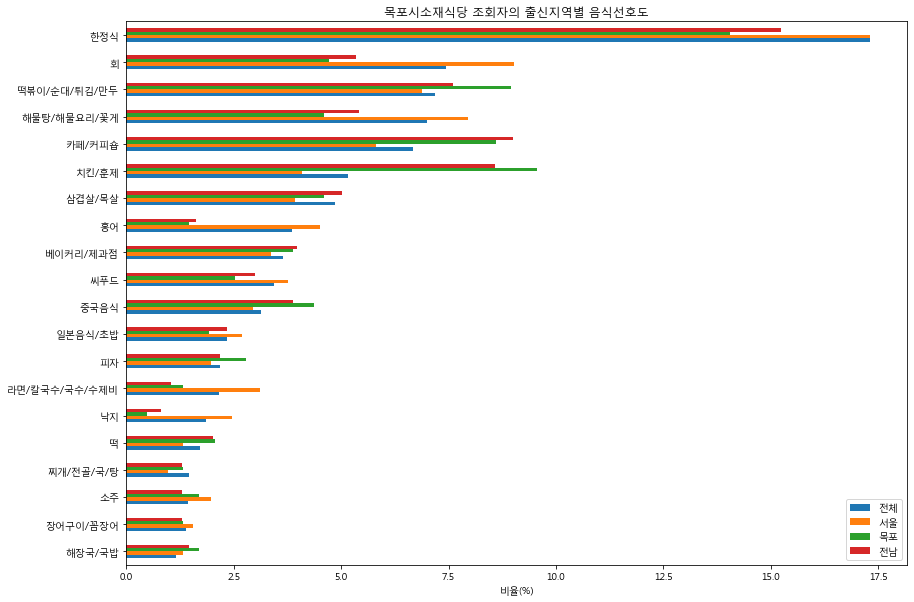

In [11]:
food_cate_mp_seoul = df_mp[df_mp.LOG_CITY_NM=='Seoul'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_mp_mp = df_mp[df_mp.LOG_CITY_NM=='Mokpo-si'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_mp_jn = df_mp[df_mp.LOG_AREA_NM=='Jeollanam-do'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)

n_hits_mp_seoul = sum(food_cate_mp_seoul.values)
n_hits_mp_mp = sum(food_cate_mp_mp.values)
n_hits_mp_jn = sum(food_cate_mp_jn.values)
print( n_hits_mp_seoul, n_hits_mp_mp, n_hits_mp_jn, n_hits_mp_seoul + n_hits_mp_mp + n_hits_mp_jn - len(df_mp)) 
# 세 지역 이외지역에서도 마이너스 된만큼 조금 방문함

food_cate_mp_seoul = food_cate_mp_seoul*100/n_hits_mp_seoul
food_cate_mp_mp = food_cate_mp_mp*100/n_hits_mp_mp
food_cate_mp_jn = food_cate_mp_jn*100/n_hits_mp_jn

food_cate_mp_tsmj = pd.concat([food_cate_mp,food_cate_mp_seoul,food_cate_mp_mp,food_cate_mp_jn],axis=1).fillna(0)
food_cate_mp_tsmj.columns=['전체','서울','목포','전남']

food_cate_mp_tsmj.iloc[-20:].plot(kind='barh',figsize=(14,10))
plt.xlabel('비율(%)')
plt.title('목포시소재식당 조회자의 출신지역별 음식선호도')
plt.show()

## 통영시 Plot

7419 1070 2081 -11756


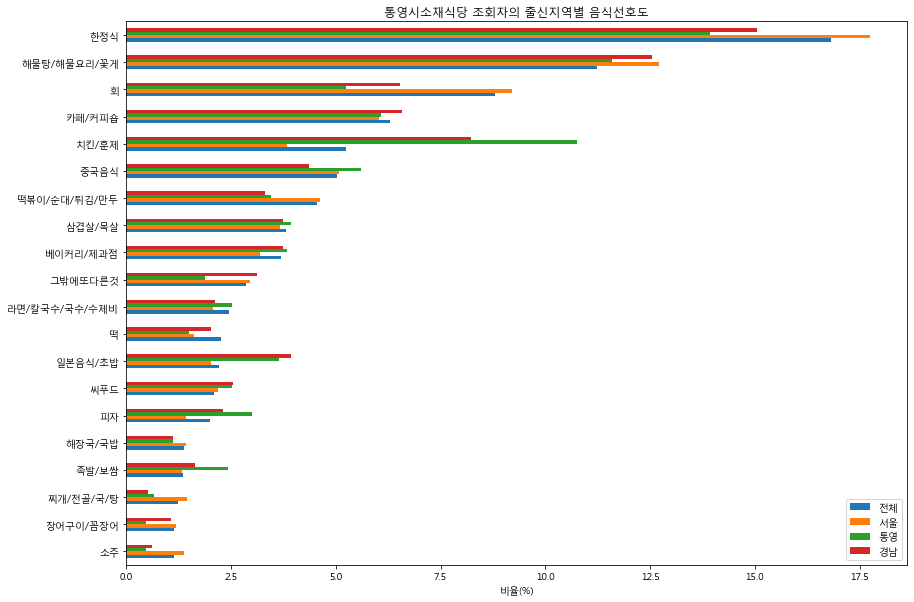

In [12]:
food_cate_ty_seoul = df_ty[df_ty.LOG_CITY_NM=='Seoul'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_ty_ty = df_ty[df_ty.LOG_CITY_NM=='Tongyeong-si'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)
food_cate_ty_gn = df_ty[df_ty.LOG_AREA_NM=='Gyeongsangnam-do'].SKSN_CGR_SCLS_NM.value_counts(ascending=True)

n_hits_ty_seoul = sum(food_cate_ty_seoul.values)
n_hits_ty_ty = sum(food_cate_ty_ty.values)
n_hits_ty_gn = sum(food_cate_ty_gn.values)
print( n_hits_ty_seoul, n_hits_ty_ty, n_hits_ty_gn, n_hits_ty_seoul + n_hits_ty_ty + n_hits_ty_gn - len(df_ty)) 
# 세 지역 이외지역에서도 마이너스 된만큼 조금 방문함

food_cate_ty_seoul = food_cate_ty_seoul*100/n_hits_ty_seoul
food_cate_ty_ty = food_cate_ty_ty*100/n_hits_ty_ty
food_cate_ty_gn = food_cate_ty_gn*100/n_hits_ty_gn

food_cate_ty_tstg = pd.concat([food_cate_ty,food_cate_ty_seoul,food_cate_ty_ty,food_cate_ty_gn],axis=1).fillna(0)
food_cate_ty_tstg.columns=['전체','서울','통영','경남']

food_cate_ty_tstg.iloc[-20:].plot(kind='barh',figsize=(14,10))
plt.xlabel('비율(%)')
plt.title('통영시소재식당 조회자의 출신지역별 음식선호도')
plt.show()

# 고군산군도/군산내지의 카페 수요/공급 비중

### 고군산 군도는 모두 "옥도면"이 주소에 들어가 있음!

In [13]:
ggs = df_gs[df_gs.ADDR.str.contains('옥도면')]

In [14]:
print(df[df.SKSN_CGR_SCLS_NM.str.contains('카페')].SKSN_CGR_SCLS_NM.shape)
print(len(df[df.SKSN_CGR_SCLS_NM=='카페/커피숍']))

(1878,)
1878


### 군산 외지인 잠재수요 (조회결과) (군산시민 제외)

In [15]:
gs_out = df_gs[df_gs.LOG_CITY_NM!='Gunsan-si']
ggs_out = ggs[ggs.LOG_CITY_NM!='Gunsan-si']

In [16]:
군산시카페조회수 = gs_out[gs_out.SKSN_CGR_SCLS_NM=='카페/커피숍'].INQ_CNT.sum()
고군산카페조회수 = ggs_out[ggs_out.SKSN_CGR_SCLS_NM=='카페/커피숍'].INQ_CNT.sum()

In [17]:
print('외지인이 조회한 군산 카페의',round(100* 고군산카페조회수/군산시카페조회수,2),'%가 고군산군도에 위치합니다. ')

외지인이 조회한 군산 카페의 7.27 %가 고군산군도에 위치합니다. 


### 고군산군도/군산내지 카페공급 (소상공인진흥공단 상가데이터)

In [18]:
dt = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_전북_202106.csv', encoding='UTF8')
dt = dt[dt.도로명주소.str.contains('군산')]

F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
# 등록된 군산의 카페업종 개수
n_cafe_gs = len(dt[dt.상권업종소분류명.str.contains('카페')])

In [20]:
# 등록된 고군산군도의 카페업종 개수
dt_ggs = dt[dt.도로명주소.str.contains('옥도면')]
n_cafe_ggs = len(dt_ggs[dt_ggs.상권업종소분류명.str.contains('카페')])

In [21]:
print('군산 카페의',round(100* n_cafe_ggs/n_cafe_gs,2),'%가 고군산군도에 위치합니다. ')

군산 카페의 2.26 %가 고군산군도에 위치합니다. 


## 고군산군도  수요와 공급 파이차트

In [25]:
r_cafe_click_ggs = round(100* 고군산카페조회수/군산시카페조회수,2)
r_cafe_click_inland = 100-round(100* 고군산카페조회수/군산시카페조회수,2)

In [27]:
r_cafe_num_ggs = round(100* n_cafe_ggs/n_cafe_gs,2)
r_cafe_num_inland = 100-round(100* n_cafe_ggs/n_cafe_gs,2)

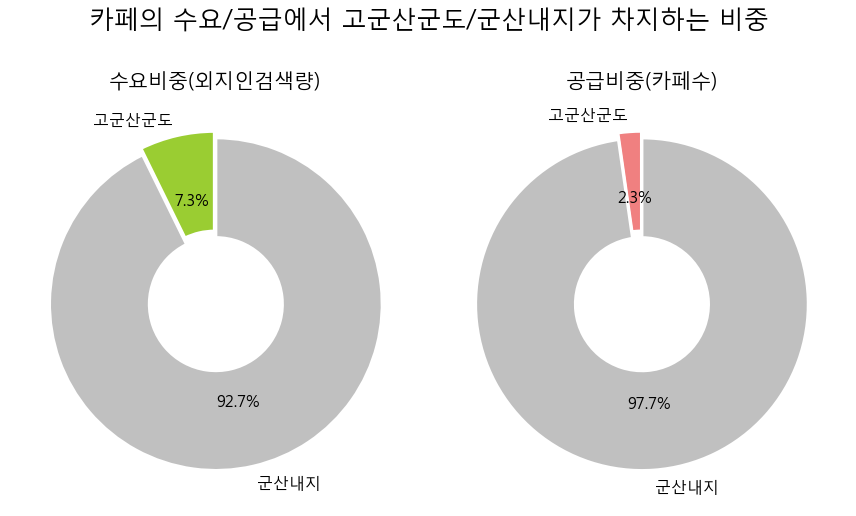

In [102]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['고군산군도','군산내지']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.02, 0.02]#, 0.02, 0.02, 0.02]

fig, axes = plt.subplots(1,2)

fig.suptitle('카페의 수요/공급에서 고군산군도/군산내지가 차지하는 비중',fontsize=25)
axes[0].set_title('수요비중(외지인검색량)',{'fontsize':20})
axes[1].set_title('공급비중(카페수)',{'fontsize':20})

axes[0].pie([r_cafe_click_ggs,r_cafe_click_inland], 
        labels=group_names, 
        colors= ['yellowgreen', 'silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

axes[1].pie([r_cafe_num_ggs,r_cafe_num_inland], 
        labels=group_names, 
        colors=['lightcoral','silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size
fig.tight_layout()

#plt.axis('equal')
#plt.show()